In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
dfTr=pd.read_csv("trainhr.csv")
dfTr.shape

(18359, 14)

In [3]:
dfTr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [3]:
dfTe=pd.read_csv("testhr.csv")
dfTe.shape

(15021, 13)

In [34]:
dfTe.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [35]:
dfTr.enrolled_university.value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

In [36]:
dfTr.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [37]:
df=dfTr.copy()      #for backup purpose

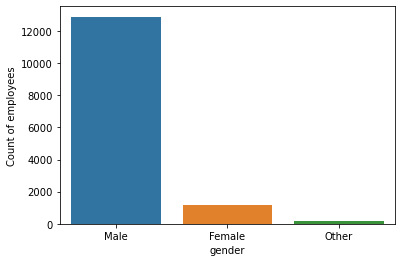

<Figure size 432x432 with 0 Axes>

In [38]:
sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values)
plt.xlabel("gender")
plt.ylabel("Count of employees")
plt.figure(figsize=(6,6))
plt.show()

Text(0.5, 1.0, 'countplot of Target Variable')

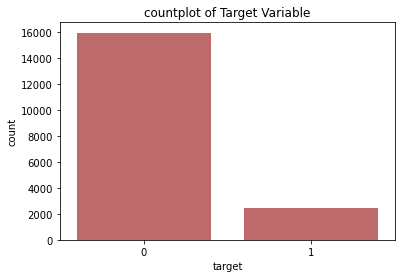

In [39]:
sns.countplot(df['target'],color="indianred")
plt.title("countplot of Target Variable")

1. Looks like there is class imbalance in the target variable.
2. As we can see below, almost 87% of the values are of one class and the rest are of another class.
3. So most of the candidates in the train data are not looking for a job change and few are looking for job change.

Text(0.5, 1.0, 'Bar plot of Gender Variable')

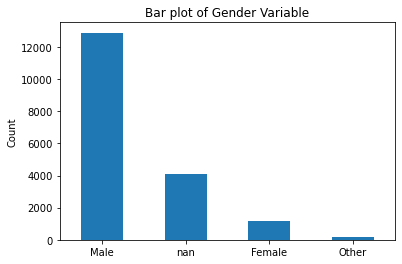

In [40]:
df['gender'].value_counts(dropna=False).sort_values(ascending=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.ylabel("Count");
plt.title("Bar plot of Gender Variable")

1. approximately 22% of the values are missing in gender variable .
2. There is also another gender apart from Male and Female. 
3. Missing values can either be imputed with the mode or missing values can be placed in another category.

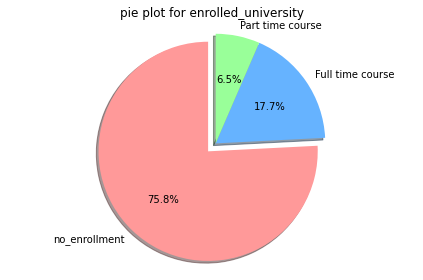

In [41]:
# Pie chart
labels =df.enrolled_university.value_counts().index
sizes = df.enrolled_university.value_counts().values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.1,0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("pie plot for enrolled_university")
ax1.axis('equal')
plt.tight_layout()
plt.show()

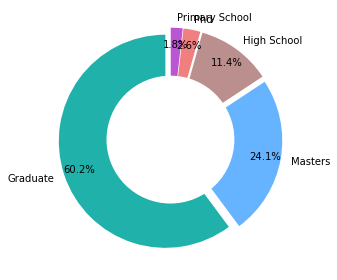

In [42]:
import matplotlib.pyplot as plt
labels =df.education_level.value_counts().index
sizes = df.education_level.value_counts().values
colors = ['#20B2AA','#66b3ff','#BC8F8F','#F08080','#BA55D3']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [43]:
df.drop(['enrollee_id','city'],axis=1,inplace=True)

In [44]:
df['gender'].value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [45]:
# Gender feature imputed with mode & converted categorical to integer(numerical)
df['gender']=df['gender'].map({'Male':1,'Female':0,'Other':2})
df['gender']=df['gender'].fillna(1).astype('int')

In [46]:
df['enrolled_university'].value_counts()
df['enrolled_university'].mode()

0    no_enrollment
dtype: object

In [47]:
df['education_level'].value_counts()
df['education_level'].mode()

0    Graduate
dtype: object

In [48]:
df['major_discipline'].value_counts()
df['major_discipline'].mode()

0    STEM
dtype: object

In [49]:
df['company_type'].value_counts()
df['company_type'].mode()

0    Pvt Ltd
dtype: object

In [50]:
# enrolled_university feature imputed with mode & converted to categorical 
df['enrolled_university']=df['enrolled_university'].fillna('no_enrollment')
df['education_level']=df['education_level'].fillna('Graduate')
df['major_discipline']=df['major_discipline'].fillna('STEM')
df['company_type']=df['company_type'].fillna('Pvt Ltd')

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['relevent_experience']=le.fit_transform(df['relevent_experience'])
df['enrolled_university']=le.fit_transform(df['enrolled_university'])
df['education_level']=le.fit_transform(df['education_level'])
df['major_discipline']=le.fit_transform(df['major_discipline'])
df['company_type']=le.fit_transform(df['company_type'])

In [52]:
df['experience'].replace({'<1':'1','>20':'20'},inplace=True)
df['experience']=df['experience'].fillna('20')                   #mode
df['experience']=df['experience'].astype('int')

In [53]:
df['company_size'].replace({'<10':'10','10/49':'30','50-99':'75','100-500':'300','500-999':'750',
                            '1000-4999':'3000','5000-9999':'7500','10000+':'10000'},inplace=True)

df['company_size']=df['company_size'].fillna('75')                #average
df['company_size']=df['company_size'].astype('int')

In [54]:
df['last_new_job'].replace({'>4':4,'never':0},inplace=True)
df['last_new_job']=df['last_new_job'].fillna(1)
df['last_new_job']=df['last_new_job'].astype('int')

In [55]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [56]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.689,1,0,2,0,5,3,300,5,1,106,0
1,0.923,1,0,2,0,5,14,10,1,1,69,0
2,0.910,1,0,2,0,5,6,75,4,2,4,0
3,0.666,1,0,2,0,5,14,75,5,1,26,0
4,0.887,1,1,2,2,5,8,75,5,2,88,1


In [57]:
df['target'].value_counts()

0    15934
1     2425
Name: target, dtype: int64

In [58]:
df['target'].value_counts(normalize=True)*100# Imbalanced dataset

0    86.79122
1    13.20878
Name: target, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [60]:
X=df.drop('target',1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12851, 11)
(5508, 11)
(12851,)
(5508,)


In [62]:
###Data balancing using smote technique
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
###Separate input features and target
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [63]:
a=sum(y_train == 1)
print("Count of label '1':",a)
b=sum(y_train == 0)
print("Count of label '0':",b)

Count of label '1': 11148
Count of label '0': 11148


In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0).fit(X_train,y_train)
#n_estimators=no of trees.
print(rf)
print('Accuracy of Bagging classifier on training set: {:.4f}'
        .format(rf.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.4f}'
        .format(rf.score(X_test, y_test)))

RandomForestClassifier(random_state=0)
Accuracy of Bagging classifier on training set: 0.9985
Accuracy of Bagging classifier on test set: 0.7660


In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
confusion = confusion_matrix(y_test, rf.predict(X_test))
print(confusion)

[[4086  700]
 [ 589  133]]


In [66]:
df1=dfTe.copy() 

In [67]:
dfTe.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

In [68]:
df1.drop(['enrollee_id','city'],axis=1,inplace=True)

In [69]:
# Gender feature imputed with mode & converted categorical to integer(numerical)
df1['gender']=df1['gender'].map({'Male':1,'Female':0,'Other':2})
df1['gender']=df1['gender'].fillna(1).astype('int')

In [70]:
# enrolled_university feature imputed with mode & converted to categorical 
df1['enrolled_university']=df1['enrolled_university'].fillna('no_enrollment')
df1['education_level']=df1['education_level'].fillna('Graduate')
df1['major_discipline']=df1['major_discipline'].fillna('STEM')
df1['company_type']=df1['company_type'].fillna('Pvt Ltd')

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['relevent_experience']=le.fit_transform(df1['relevent_experience'])
df1['enrolled_university']=le.fit_transform(df1['enrolled_university'])
df1['education_level']=le.fit_transform(df1['education_level'])
df1['major_discipline']=le.fit_transform(df1['major_discipline'])
df1['company_type']=le.fit_transform(df1['company_type'])

In [72]:
df1['experience'].replace({'<1':'1','>20':'20'},inplace=True)
df1['experience']=df1['experience'].fillna('20')                   #mode
df1['experience']=df1['experience'].astype('int')

df1['company_size'].replace({'<10':'10','10/49':'30','50-99':'75','100-500':'300','500-999':'750',
                            '1000-4999':'3000','5000-9999':'7500','10000+':'10000'},inplace=True)

df1['company_size']=df1['company_size'].fillna('75')                #average
df1['company_size']=df1['company_size'].astype('int')

df1['last_new_job'].replace({'>4':4,'never':0},inplace=True)
df1['last_new_job']=df1['last_new_job'].fillna(1)
df1['last_new_job']=df1['last_new_job'].astype('int')

In [73]:
df1.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [74]:
predicted_valuerf=rf.predict(df1)
print(predicted_valuerf)

[1 0 0 ... 0 0 0]


In [ ]:
Id=dfTe['enrollee_id']

In [ ]:
file=pd.DataFrame({'enrollee_id':Id,'target':predicted_valuerf})
file.to_csv("s_submissionrf1.csv",index=False)